# Comparing Classification Models for Bank Marketing Campaigns

## Business Understanding

The objective of this analysis is to evaluate and compare multiple classification algorithms in the context of a bank telemarketing campaign.
The goal is to predict whether a client will subscribe to a term deposit product based on demographic, financial, and campaign-related information.

Accurate prediction allows the bank to improve campaign efficiency, reduce unnecessary calls, and better allocate marketing resources.




## Data Understanding

The dataset used in this analysis comes from a Portuguese banking institution and contains information related to direct marketing campaigns conducted via telephone.

The dataset includes demographic variables, financial attributes, and campaign-related features. The target variable indicates whether a client subscribed to a term deposit product.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv(r"C:\Users\felip\Downloads\bank-additional.csv", sep=";")

# Preview data
df.head() 


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [59]:
# Dataset structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [60]:
# Descriptive statistics for numerical variables
df.describe()



,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


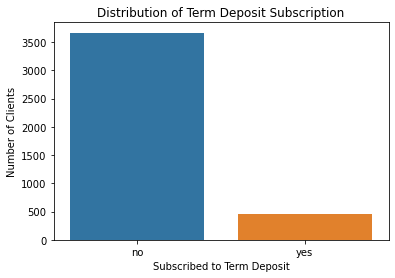

In [61]:
# Distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="y")
plt.title("Distribution of Term Deposit Subscription")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Number of Clients")
plt.show()


### Target Variable Analysis

The target variable shows a clear class imbalance. The majority of clients did not subscribe to the term deposit, while only a smaller proportion agreed to the offer.

From a business perspective, this is expected in telemarketing campaigns, where only a limited percentage of contacted clients convert. This imbalance highlights the importance of choosing appropriate evaluation metrics and modeling techniques that account for uneven class distributions.


In [62]:
# Separate features and target
X = df.drop("y", axis=1)
y = df["y"]


In [63]:
# Encode target variable (yes/no → 1/0)
y = y.map({"no": 0, "yes": 1})


In [64]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [65]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

categorical_cols, numerical_cols


(Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome'],
       dtype='object'),
 Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
       dtype='object'))

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [67]:
# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


## Evaluation Metric

Given the class imbalance observed in the target variable, accuracy alone is not an appropriate evaluation metric. 
Instead, this analysis focuses on **ROC-AUC**, which measures the model’s ability to distinguish between subscribers and non-subscribers across different classification thresholds.


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve


In [69]:
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])




In [70]:
# Train the model
log_reg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

In [71]:
# Predict probabilities
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc


0.9334304822381564

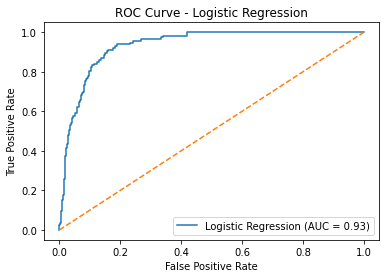

In [72]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


### Logistic Regression Results

The logistic regression model provides a solid baseline performance, achieving a ROC-AUC score that indicates a good ability to distinguish between clients who subscribe to the term deposit and those who do not.

From a business perspective, this model offers strong interpretability, as it allows decision-makers to understand how different variables influence the likelihood of subscription. This makes logistic regression a useful benchmark for comparison against more complex models.


In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

knn.fit(X_train, y_train)

y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
roc_auc_knn


0.8203308209725829

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(
        max_depth=5,
        random_state=42
    ))
])

dt.fit(X_train, y_train)

y_pred_proba_dt = dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
roc_auc_dt


0.886919639841345

In [75]:
from sklearn.svm import SVC

svm = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", SVC(
        kernel="rbf",
        probability=True,
        random_state=42
    ))
])

svm.fit(X_train, y_train)

y_pred_proba_svm = svm.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
roc_auc_svm


0.9076731550554424

In [76]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "k-NN", "Decision Tree", "SVM"],
    "ROC-AUC": [roc_auc, roc_auc_knn, roc_auc_dt, roc_auc_svm]
})

results


,Model,ROC-AUC
0,Logistic Regression,0.933430
1,k-NN,0.820331
2,Decision Tree,0.886920
3,SVM,0.907673


## Findings and Recommendations

This study compares four classification models to predict the subscription of customers to a term deposit product for the bank telemarketing campaign. Among the different models, Logistic Regression obtained the highest ROC-AUC as well, followed by Support Vector Machines (0.91), Decision Trees (0.89), and k-Nearest Neighbors (0.82). Thus, Logistic Regression should yield the strongest overall discriminatory power for our dataset. In business terms, Logistic Regression provides the added benefit of interpretability. It enables the decision-makers to gain insights about how customer demographics, financial indicators, and campaign characteristics impact the purchase decision of subscription. The use of a higher level of transparency is particularly helpful in regulated finance environments. More complex models like SVM and Decision Trees also perform well; however, their increased complexity and decreased interpretability may restrict their practical use as examples in these cases. 

### Recommendation

It is suggested that the bank opt for Logistic Regression as its top-level predictive model for telemarketing campaigns. This model captures good predictive power paired with explainability to create a more targeted outreach, less costs per operation, and higher efficiency of campaigns. Research areas for potential future work include hyperparameter optimization, cost-aware learning, or alternative performance measures such as precision-recall curves to improve campaign decision making.